In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
decision_scores = log_reg.decision_function(X_test)

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thersholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thersholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

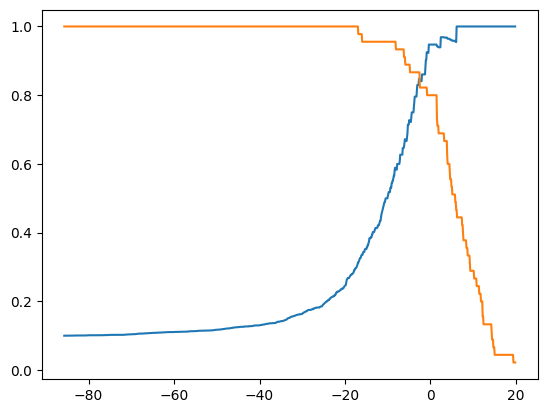

In [6]:
plt.plot(thersholds, precisions)
plt.plot(thersholds, recalls)
plt.show()

### Precision-Recall曲线

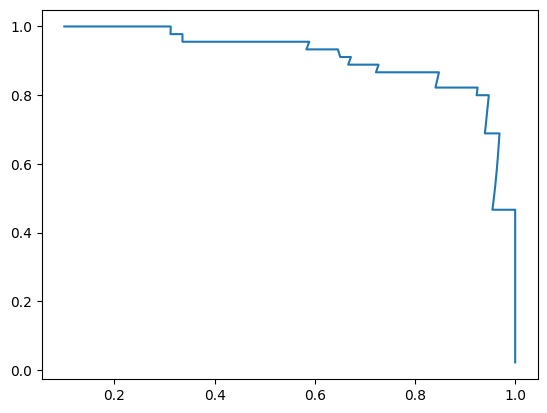

In [7]:
plt.plot(precisions, recalls)
plt.show()

### scikit-learn中的Precision-Recall曲线

In [13]:
from sklearn.metrics import precision_recall_curve

precisions2, recalls2, thresholds2 = precision_recall_curve(y_test, decision_scores)

In [14]:
precisions2.shape

(451,)

In [15]:
recalls2.shape

(451,)

In [16]:
thresholds2.shape

(450,)

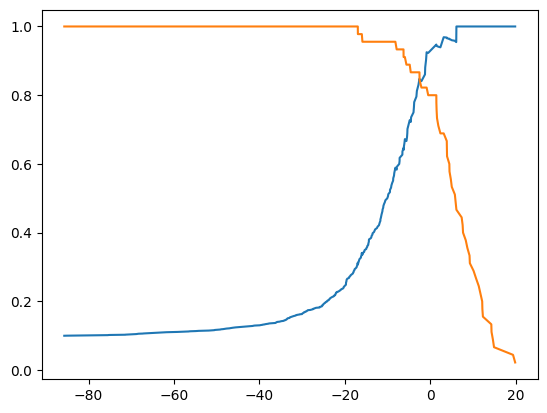

In [18]:
plt.plot(thresholds2, precisions2[:-1])
plt.plot(thresholds2, recalls2[:-1])
plt.show()

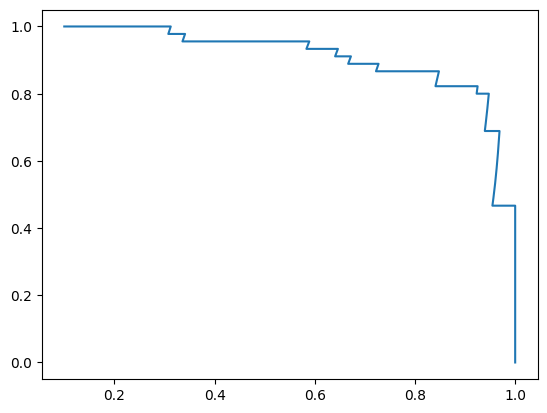

In [19]:
plt.plot(precisions2, recalls2)
plt.show()